# 115. CLUSTERING 

#### ALGORITMO SUPERVISADO
Sabemos que los algoritmos supervisados dependen de datos historicos para dar una respuesta en base a conocer datos, los supervisados usan este valor conocido del pasado para entrenar sus datos y construir un modelo que sea capaz de predecir un valor de una variable del dataset en el futuro. 
#### ALGORITMO NO SUPERVISADO
Estos no tienen nignuna restriccion, tampoco necesitan tener valores del pasado para devolver una variable de salida, sino que todas las variables del dataset se usan como predictoras para construir un modelo, sin necesidad de datos previos. El clustering es un algoritmo no supervisado, se contruye de manera inmediata un modelo con los datos que se tiene. el clustering la segmentacion categoriza las entradas del dataset en clases, grupos, segmentos, donde las entradas son similares entre si, tienen caracteristicas en comun, se pueden definir de alguna formal, de las que etsam afuera del clusters, entre clusters tenemos elementos que son iguales. 


## CLUSTERING 
Clasificacion, cluster conjunto de datos homogeneos, crea grupos homogeneos. 
* El objetivo es agrupar los datos que presenten ciertas semenjanzas entre sus miembros, es decir que se parezcan. 
* Tambien buscamos los datos que pertenezcan a grupos (clusters) diferentes tengan rastos lo suficentemente diferentes entre si. 
El cluster buscara juntar lo que se parece y separar cosas que no tengan nada que ver, entre las observaciones del dataset. \ 
#### ¿Como se clusteriza?


# 117. EL CONCEPTO DE DISTANCIA 

Basicamente el clustering tiende a agrupar cosas que se parezcan y a separar cosas que no tienen nada que ver, por tanto hablaremos de las distancias que se pueden calcular entre distintas observaciones. 


# 118. MATRIZ DE DISTANCIAS EN PYTHON 

In [2]:
from scipy.spatial import distance_matrix
import pandas as pd

In [3]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/movies/movies.csv", sep = ";")

In [4]:
data #tenemos las valoraciones que el usuario le ha dado a dichas peliculas. 
#Nosotros queremos calcular la distancia que existe entre las peliculas, la columna de use_id no sirve de mucho. 

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


In [5]:
movies = data.columns.values.tolist()[1:] #Asi quitamos el User_id. para llevar acabo el calculo de las distancias. 
movies #Cabecera de las peliculas. 

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [70]:
#Calcularemos la matriz de distancias. 
dd1 = distance_matrix(data[movies], data[movies], p = 1) #Distancia de manhattan
dd2 = distance_matrix(data[movies], data[movies], p = 2)#Distancia euclidea
dd10 = distance_matrix(data[movies], data[movies], p = 10)#Distancia 10. 

In [71]:
dd1 #array de distancias. 

array([[ 0. ,  9.9, 15.9,  9.1,  4.2,  6.9, 10.5,  7.4,  5.6,  0.7],
       [ 9.9,  0. , 12.4, 17.2,  6.1,  6.2,  0.8,  4.9, 11.7,  9.6],
       [15.9, 12.4,  0. , 12.4, 18.5,  9. , 12. , 17.3, 12.9, 15.2],
       [ 9.1, 17.2, 12.4,  0. , 12.7, 11. , 18. , 15.3,  5.5,  8.8],
       [ 4.2,  6.1, 18.5, 12.7,  0. ,  9.5,  6.5,  3.2,  8.2,  3.9],
       [ 6.9,  6.2,  9. , 11. ,  9.5,  0. ,  7. ,  8.3,  5.5,  6.2],
       [10.5,  0.8, 12. , 18. ,  6.5,  7. ,  0. ,  5.3, 12.5, 10.2],
       [ 7.4,  4.9, 17.3, 15.3,  3.2,  8.3,  5.3,  0. ,  9.8,  7.1],
       [ 5.6, 11.7, 12.9,  5.5,  8.2,  5.5, 12.5,  9.8,  0. ,  4.9],
       [ 0.7,  9.6, 15.2,  8.8,  3.9,  6.2, 10.2,  7.1,  4.9,  0. ]])

In [72]:
#Crearemos un dataframe
def dm_to_df(dd, col_name): 
    import pandas as pd
    return pd.DataFrame(dd, index = col_name, columns = col_name)

In [73]:
dm_to_df(dd1, data["user_id"])
#Usuarios que estan muy lejos: 
#El usuario 3 del 1 estan a 15.9 puntos en manhattan.
#Usuarios que se parezcan: 
#el 1 y 10, tienen gustos muy parecidos. 
#dos que no se parecen en nada el 3 del 5. 

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [74]:
#calcularemos la distancia 
dm_to_df(dd2, data["user_id"])


user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [75]:
dm_to_df(dd10, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


Vemos que conforme incrementa el indice de la distancia p, disminuye la distancia entre los objetos. 


In [76]:
#De forma visual. 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #hacer representaciones graficas en 3d. 

In [77]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [78]:
ax = fig.add_subplot(111, projection = "3d")

In [79]:
ax #Tenemos solo el grafico 

In [80]:
#Para visualizar dicho grafico. 
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"] , zs = data["harry_potter"])

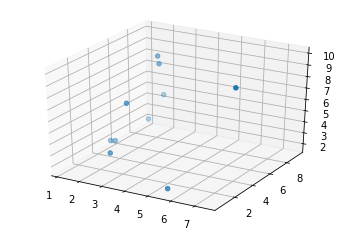

In [81]:
#Juntamos todo. 
fig = plt.figure() #hacemos un grafico vacio.
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"] , zs = data["harry_potter"])
#Cada punto es un usario evaluando a cada una pelicula. 

# 118. METODOS DE ENLACE

Los llamados metodos jerarquicos tienen por objetivo agrupar clusters para crear uno de nuevo o bien separar un cluster ya existente para dar origen a otros dos de forma que sucesivamente se vaya efecutando este proceso ya sea de aglomeracion o division minimizando alguna distancia o maximizando. Los metodos jerarquicos para crear clusters, se suelen dividir en los aglomerativos y en los disociativos. 
### AGLOMERATIVOS
Empezaremos con un conjunto de n observaciones con tantos clusters como obervaciones, en el sigueinte nivel agruparemos los clusters con mayor semenjanza o menor distancia entre ellos y asi sucesivamente.  
## METODOS PARA UNIR CLUSTERS. 
#### ENLACE SIMPLE
* La distancia entre dos clusters es el minimo de las distancias entre cualquier dos puntos del cluster 1 y el cluster 2. 
* Dos clusters con la distancia minima entre ellos se combinan del siguiente modo.
#### ENLACE COMPLETO 
* La distancia entre dos clusters es el maximo de las distancias entre cualquier dos puntos del cluster 1 y el cluster 2. 
* Dos clusters con la distancia maxima entre ellos se combinan del siguiente modo. 
#### ENLACE DEL CENTROIDE 
* La distancia entre dos clusters es la distancia entre el centroide (punto medio) del cluster 1 y el cntroide (punto medio) del cluster 2. 
* Dos clusters con la distancia minima entre ellos se combinan del siguiente modo. 
#### ENLACE DE WARD 

Con estas 5 formas de enlace, de poder unir puntos o clusters de forma jerarquica, nos vemos en la necesidad de definir que es un cluster jerarquico. 
## CLUSTER JERARQUICO 
* Metodo aglomerativo donde cada punto empieza siendo un unico clister y en cada paso los vamos juntando hasta tener un unico cluster basado en las similitudes entre observaciones. 
1. Empezamos con cada observacion en un cluster(tenemos N clusters)
2. Encontramos la menor distancia en la matriz de distancias y unimos las dos observaciones en un nuevo cluster. 
3. Recalculamos las distancias entre los clusters antiguos y el nuevo recien creado con alguno de los metodos de enalce vistos. 
4. Repetimos los pasos 2 y3 hasta que solo queda un cluster con las N obseraciones. 

# 120. UNIENDO DATOS MANUALMENTE 

In [82]:
#tomaremos la matriz de distancias pasada. 
df = dm_to_df(dd1, data["user_id"])
df


user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [83]:
#Lo que haremos sera es recrear a mano ese proceso del cluster, de como realmente el cluster se encarga de ir, buscando los dos elementos
#que mas se parecen y se van aglutinando. 
#creamos una matriz vacia 
Z = [] 


In [84]:
#De todas las filas y todas las columnas habria que localizar, cual es la mas pequeña, la distancia mas pequeña entre 
#dos elementos cualesquiera. 
#definimos 
df[11]  = df[1] + df[10] #Unimos la columna 1 con la 10 para crear la columna #11
df.loc[11] = df.loc[1] + df.loc[10] #Pero tambien lo haremos por filas de modo que: crear fila #11 que resulte de sumar la fila 1 y la 10.
Z.append([1,10,0.7,2]) #con un array definimos que hemos unido el punto #1 con el #10, que estaban a distancia 0.7 y que hemos unidos dos puntos. 
df #Z es el cluster. 

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


In [85]:
#Ahora hay que recalcular las distancias a todos y cada uno de los puntos. 
#Podiamos tomar el minimo de las distancias existentes, por tanto ahora habria que recalcular todas las filas y todas las columnas 
#en base a una minima distancia. 
#1 y 10 van a desaparecer 

In [86]:
for i in df.columns.values.tolist():
    df.loc[11][i] = min(df.loc[1][i], df.loc[10][i])
    df.loc[i][11] = min(df.loc[i][11], df.loc[i][10])
df

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,4.9


In [105]:
df = df.drop([1], axis = 1) #Eliminamos las filas y columnas 1 y 10. 

KeyError: '[1] not found in axis'

In [123]:
df = df.drop([10], axis = 1)

KeyError: '[10] not found in axis'

In [121]:
df = df.drop([10], axis = 0)

In [122]:
df 

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9
11,9.6,15.2,8.8,3.9,6.2,10.2,7.1,4.9,0.0


In [125]:
x = 2
y = 7
n = 12
#Haremos las 3 cosas de golpe. 
#1. ver quien entra el cluster
#2. como recalcular las distancias 
#3. a quien eliminamos
#en este caso seria juntar el #2 con el #7. 
df[n]  = df[x] + df[y] 
df.loc[n] = df.loc[x] + df.loc[y] 
Z.append([x,y,df.loc[x][y], 2]) 


for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y], axis = 0)
df = df.drop([x,y], axis = 1)
df
#

user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,15.2,12.0
4,12.4,0.0,12.7,11.0,15.3,5.5,8.8,17.2
5,18.5,12.7,0.0,9.5,3.2,8.2,3.9,6.1
6,9.0,11.0,9.5,0.0,8.3,5.5,6.2,6.2
8,17.3,15.3,3.2,8.3,0.0,9.8,7.1,4.9
9,12.9,5.5,8.2,5.5,9.8,0.0,4.9,11.7
11,15.2,8.8,3.9,6.2,7.1,4.9,0.0,9.6
12,12.0,17.2,6.1,6.2,4.9,11.7,9.6,0.0


In [126]:
Z
#los cluster que llevamos hechos hasta ahorita. 

[[1, 10, 0.7, 2], [2, 7, 0.7999999999999994, 2]]

In [131]:
#juntamos el 5 con el 8.
x = 5
y = 8
n = 13

df[n]  = df[x] + df[y] 
df.loc[n] = df.loc[x] + df.loc[y] 
Z.append([x,y,df.loc[x][y], 2]) 


for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y], axis = 0)
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,15.2,12.0,17.3
4,12.4,0.0,11.0,5.5,8.8,17.2,12.7
6,9.0,11.0,0.0,5.5,6.2,6.2,8.3
9,12.9,5.5,5.5,0.0,4.9,11.7,8.2
11,15.2,8.8,6.2,4.9,0.0,9.6,3.9
12,12.0,17.2,6.2,11.7,9.6,0.0,4.9
13,17.3,12.7,8.3,8.2,3.9,4.9,0.0


In [132]:
x =11
y = 13
n = 14

df[n]  = df[x] + df[y] 
df.loc[n] = df.loc[x] + df.loc[y] 
Z.append([x,y,df.loc[x][y], 2]) 


for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y], axis = 0)
df = df.drop([x,y], axis = 1)
df

user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,12.0,15.2
4,12.4,0.0,11.0,5.5,17.2,8.8
6,9.0,11.0,0.0,5.5,6.2,6.2
9,12.9,5.5,5.5,0.0,11.7,4.9
12,12.0,17.2,6.2,11.7,0.0,4.9
14,15.2,8.8,6.2,4.9,4.9,0.0


In [133]:
x = 9
y = 12
z = 14
n = 15 #cluster numero 15. 

df[n]  = df[x] + df[y] 
df.loc[n] = df.loc[x] + df.loc[y] 
Z.append([x,y,df.loc[x][y], 3]) 


for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])

df = df.drop([x,y,z], axis = 0)
df = df.drop([x,y,z], axis = 1)
df

user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,12.0
4,12.4,0.0,11.0,5.5
6,9.0,11.0,0.0,5.5
15,12.0,5.5,5.5,0.0


In [134]:
x = 4
y = 6
z = 15
n = 16

df[n]  = df[x] + df[y] 
df.loc[n] = df.loc[x] + df.loc[y] 
Z.append([x,y,df.loc[x][y], 3]) 


for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i], df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])

df = df.drop([x,y,z], axis = 0)
df = df.drop([x,y,z], axis = 1)
df

user_id,3,16
user_id,,
3,0.0,9.0
16,9.0,0.0


In [135]:
x =3
y = 16
n = 17

df[n]  = df[x] + df[y] 
df.loc[n] = df.loc[x] + df.loc[y] 
Z.append([x,y,df.loc[x][y], 2]) 


for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i], df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y], axis = 0)
df = df.drop([x,y], axis = 1)
df

user_id,17
user_id,
17,0.0


In [137]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 [11, 13, 3.900000000000001, 2],
 [9, 12, 11.7, 3],
 [4, 6, 11.0, 3],
 [3, 16, 9.0, 2]]

In [ ]:
#Estas son todas las unionen que hemos hecho. 
#Esta matriz de datos nos da el sketch de un grafico para ver como ha quedado aglutinado la informacion. 

## ¿COMO AUTOMATIZAMOS ESTO CON ALGORITMOS DE MACHINE LEARNING?

# 121. CLUSTER JERARQUICO CON PYTHON 

Cluster Jerarquico usando las tecnicas de python.

In [9]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
#Importamos dendograma y linkage para hacer los enlaces. 

In [6]:
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [7]:
data[movies] #Las valoraciones de cada pelicula. 

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


In [11]:
Z = linkage(data[movies], "ward")
Z
#Cada una de las filas del datase han iso unidas con criterios similares a los que nosotros hemos aportado. 
#el usuario 1 y 9 han sido unidos a distancia 0.41, en un cluster de dos elementos. 



array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

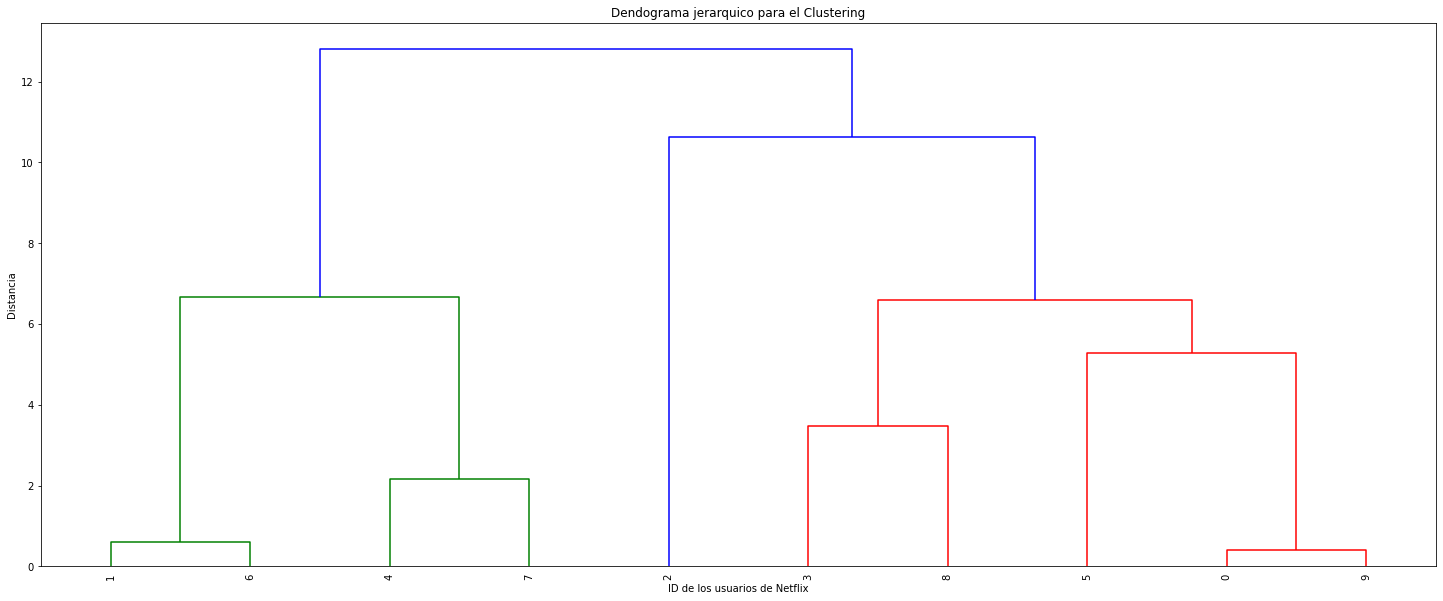

In [15]:
#Para pintas un dendograma. 
plt.figure(figsize = (25,10))
plt.title("Dendograma jerarquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation = 90.,leaf_font_size = 10.0)
plt.show()
#Los clusters quedan pintandos de color. 
#ha quedado  muy bien para representar la informacion de forma jerarquica y automatizada. 


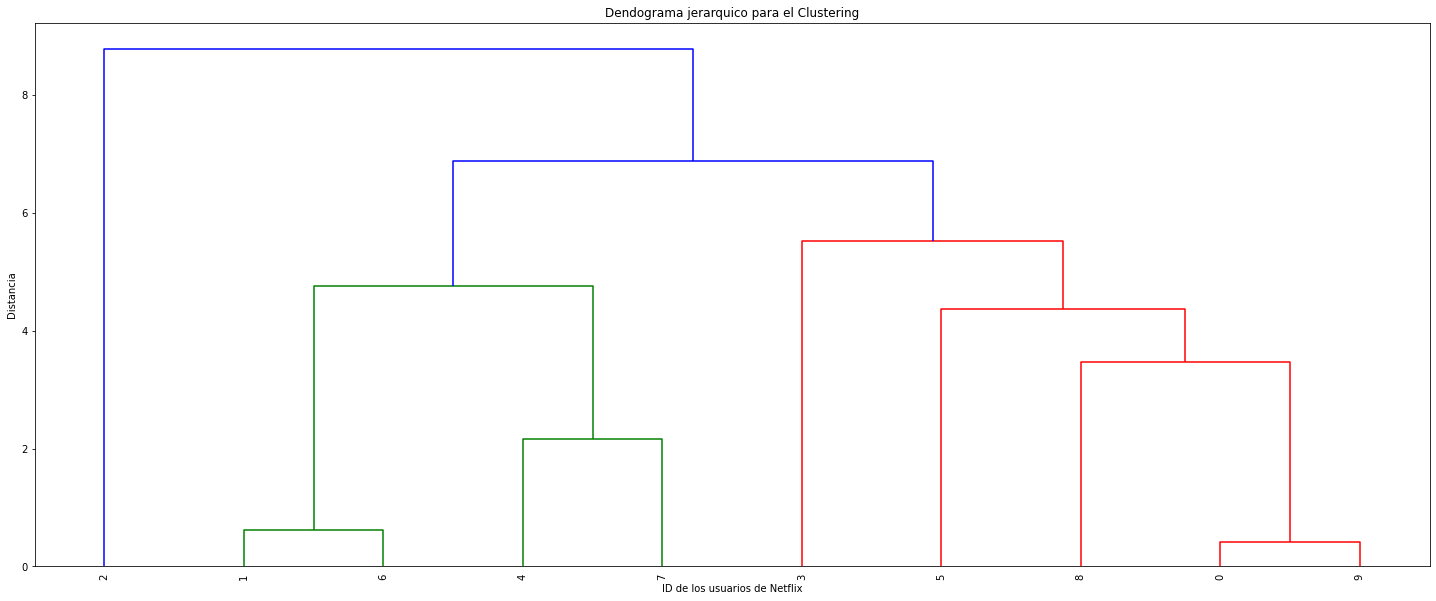

In [16]:
#Podriamos pintar el dendograma con otro tipo de enlace. 
#si usamos el enlace promedio. 
Z = linkage(data[movies], "average")
Z
plt.figure(figsize = (25,10))
plt.title("Dendograma jerarquico para el Clustering")
plt.xlabel("ID de los usuarios de Netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation = 90.,leaf_font_size = 10.0)
plt.show()

In [ ]:
#¿porque el usuario 2 ha sido eliminado de todos los clusters? 
#porque es un usuario que es atipico, sus valoraciones estan fuera de lugar con todas las demas. 

# 122. UN CLUSTERING COMPLETO: LA FASE DE EXPLORACION DE DATOS

- X dataset (array de n x m) de puntos a clusterizar 
- n numero de datos 
- m numero de rasgos 
- z array de enlace del cluster con la informacion de las uniones 
- k numeros de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage 
import numpy as np 

(150, 2)


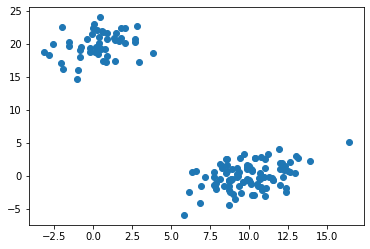

In [8]:
#Generaremos datos aleatorios 
#generaremos dos clusters. 
np.random.seed(4711)
a = np.random.multivariate_normal([10,0], [[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()
#Tenemos en total 150 datos, de los cuales 100 son una normal que estan en torno al punto 10. 
#en el otro caso esta entorno al 0,20, de media 0 en x, 20 en y. 
#haremos un cluster jerarquico. 

In [19]:
Z = linkage(X, "ward")
Z #Son todos los enlaces que se han establecidos. 
#Matriz de enlaces. 
#Nos da la distancia del cluster y el numero de elementos que se han enlazados . 


array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [20]:
from scipy.cluster.hierarchy import cophenet #Comprobar el coef de correlacion cofenetico del clustering. 
#Compara las distancias dos a dos de nuestras muestras con las que se han llevado acabo en el cluster jerarquico
#cuanto mas cercano sea el valor 1, mejor sera el clustering ya que preservara las ditancias originales que hubiera entre
#las distintas oberservaciones. 
from scipy.spatial.distance import pdist 


In [22]:
c, coph_dist = cophenet(Z, pdist(X)) 
c #que de precisa ha sido, 98% de la conservacion de las distancias originales con respecto a los clusterings que se han generado. 

0.9800148387574268

In [27]:
Z[0] #tenemos la info de que el punto de datos numero 52 y 53 son los mas cercanos con una distancia de 
#4.15 y ha generado un cluster de 2 elementos. 

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [28]:
Z[1] #Ha unido el 14 con el 79, ha una dist pequeño, formando un cluster de 2 elementos. 

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [29]:
Z[:20] #

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [30]:
#[6.20000000e+01, 1.52000000e+02, 1.72599535e-01, 3.00000000e+00]
Z[152 - len(X)] #Cluster 152 

array([33.        , 68.        ,  0.07106779,  2.        ])

In [31]:
X[[33,62,68]] #Estos 3 elementos los junta. 

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

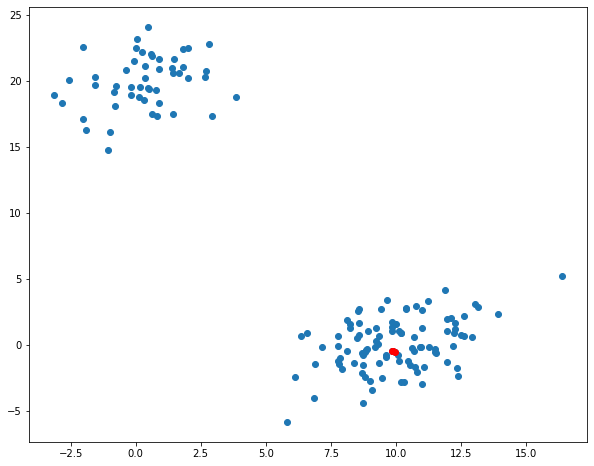

In [33]:
idx = [33,62,68]
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1]) #pintar todos los puntos 
plt.scatter(X[idx,0], X[idx, 1], c = 'r') #Destacamos en rojo los puntos de interes. 
plt.show()

In [35]:
X[:,0] #Todas las filas y columna 0, 

array([ 9.21188389e+00,  8.88937431e+00,  1.07684006e+01,  8.24213268e+00,
        5.79670090e+00,  6.34993090e+00,  8.10571230e+00,  8.72084884e+00,
        8.83500513e+00,  1.04006121e+01,  1.19550340e+01,  8.50141850e+00,
        9.23359190e+00,  1.22776800e+01,  1.09590184e+01,  8.72437412e+00,
        9.64949127e+00,  1.14991208e+01,  1.14825643e+01,  8.58740424e+00,
        1.19557043e+01,  9.85622312e+00,  1.01183101e+01,  7.76042253e+00,
        1.09979416e+01,  6.90850201e+00,  7.85787065e+00,  6.12508463e+00,
        1.06114379e+01,  1.10921749e+01,  7.15906941e+00,  1.07378401e+01,
        8.23931855e+00,  9.83913054e+00,  1.12622203e+01,  1.06780159e+01,
        1.39081564e+01,  1.12197936e+01,  9.08490874e+00,  7.77229101e+00,
        1.63633299e+01,  8.81582877e+00,  8.13179077e+00,  1.01349908e+01,
        8.59430666e+00,  8.98565337e+00,  9.86312125e+00,  1.22599442e+01,
        1.21914459e+01,  1.23745026e+01,  9.98417669e+00,  8.68402478e+00,
        1.01880312e+01,  

## REPRESENTACION GRAFICA DE UN DENDROGRAMA 

Visualizacion grafica en forma de arbol que muestra el orden y las distancias de las uniones que ocurren en un clustering jerarquico. 

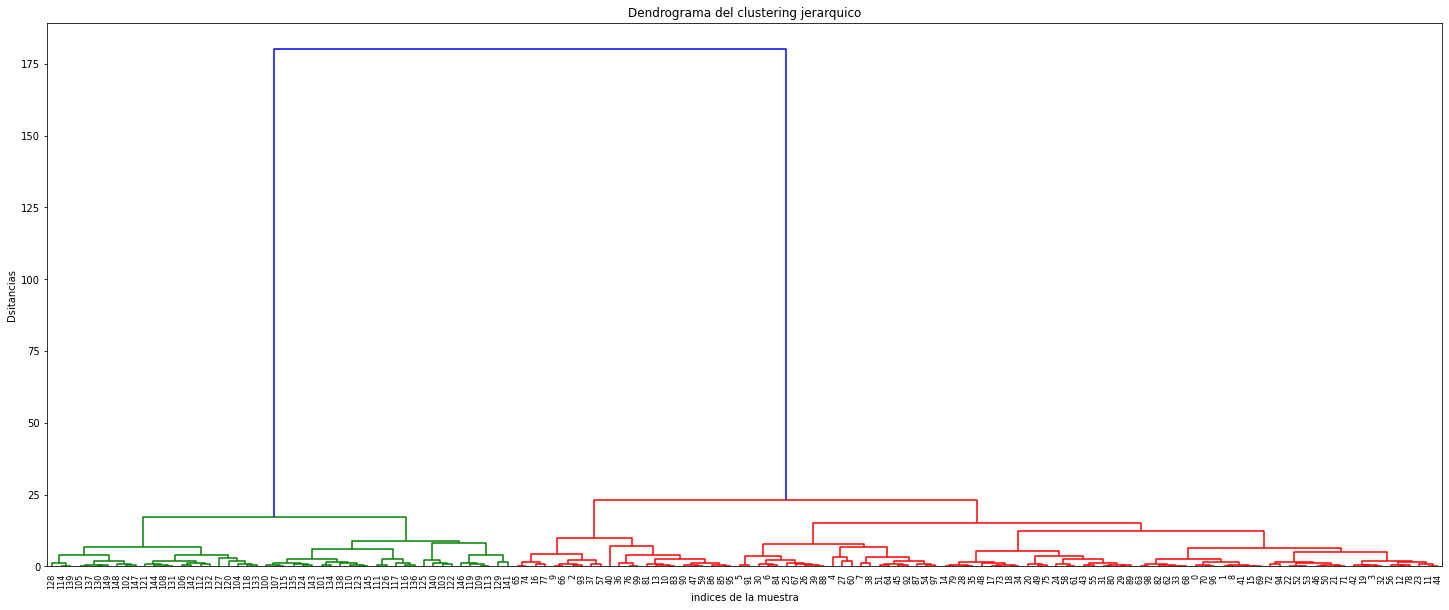

In [37]:
plt.figure(figsize = (25,10))
plt.title("Dendrograma del clustering jerarquico")
plt.xlabel("indices de la muestra")
plt.ylabel("Dsitancias")
dendrogram(Z, leaf_rotation = 90., leaf_font_size = 8.0)
plt.show()

In [40]:
Z[-4:,] #Claramente nuestra poblacion esta dividida en dos grupos. 
#¿Existe una forma de poder hacer esta representacion mas sencilla? Si. 

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### TRUNCAR EL DENDROGRAMA 
Para truncarlo, debemos expecificar una version reducida del mismo. 

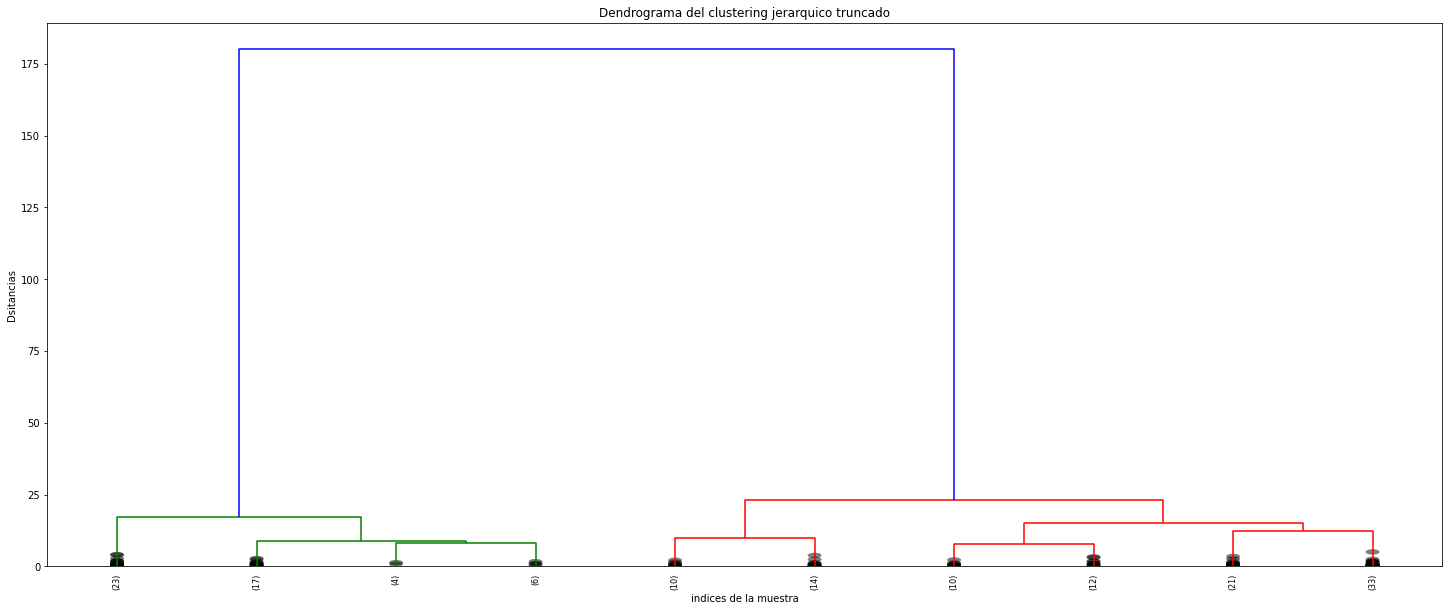

In [68]:
plt.figure(figsize = (25,10))
plt.title("Dendrograma del clustering jerarquico truncado")
plt.xlabel("indices de la muestra")
plt.ylabel("Dsitancias")
dendrogram(Z, leaf_rotation = 90., leaf_font_size = 8.0, truncate_mode = "lastp", p = 10, show_leaf_counts = True, 
          show_contracted = True)
plt.show()
#Solo mostramos las 10 ultimas uniones. 

In [69]:
#Podemos crear una funcion que tunee y aporte a cada una de las lineas horizontales donde se unen, un pequeño punto 
#indicando la altura de union, 
#todo esto apesar de que la visualizacion ya es una muy buena, 
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annote_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering Jerarquico con Dendrograma truncado")
        plt.xlabel("Indice del Dataset (o tamaños del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c = c)
                plt.annotate('%.3g'%y, (x,y), xytext = (0, -5) , textcoords = "offset points", va = "top", ha = "center")
                
            
    if max_d:
        plt.axhline(y = max_d, c = 'k')
    
    return ddata
        

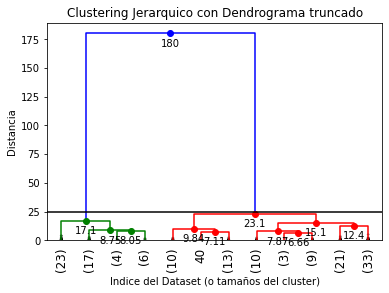

In [76]:
dendrogram_tune(Z, truncate_mode = 'lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12., 
                show_contracted = True, max_d = 25)
plt.show()
#Vemos que aparecen los numeros 5 puntos por debajo y centrados, aparecen todas las distancias donde han sido unidas. 
#

## POR DONDE CORTAMOS EL DENDROGRAMA 
Gracias a la funcion podemos establecer un truncamiento, una linea horizontal que corte a una determina altura el dendrograma y ser capaces de ver cuantos cluster resultan, a una distancia de 20, salian 3 clusters, si cortamos mas arriba, ya solo quedaran dos clusters, mas abajos se corte mas clusters habran. \ 
Nos gustaria es ver la forma de generar un algoritmo no supervisado que automaticamente pueda decidir cuantos grupos deban geenrarse, seria lo ideal, tener una seleccion automatica del corte que se debe realizar para tener el numeros de cluster optimo. la seleccion manual, es una buena opcion como justamente la funcion que acabamos de crear. \
Metodo de incosistencia para decidir el corte. \ 


METODO DE CORTE AUTOMATICA DEL DONDROGRAMA 
Lo que hara sera intentar ajustar la incosistencia como la fraccion entre una determinada altura - el promedio de todas las alturas. 
- inconsistency_i = (h_i - avg(h_j) / std(h_j))

In [80]:
from scipy.cluster.hierarchy import inconsistent
#Esto basicamente va a permitir llevar acabo el calculo de la incosistencia para todos los clusters que se han formado 
#nosotros elegimos la profundidad y buscamos las incosistencias. 

In [83]:
depth = 5 
incons = inconsistent(Z, depth)
incons[-10:]
#Esto lo que nos imprime 
#Nos da el promedio, desviacione standar, numero de elementos y factor de inconsistencia para cada uno de las uniones. 

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

# 126. EL METODO DE K - MEANS

Algoritmo no supervisado para dividir un numero de observaciones en determinados grupos, la distincion con el cluster jerarquico es que ya no se hara una clasificacion jerarquico ni establecer un dendrograma ni un ajerarquia, sino los datos se dividen de k grupos. antes de empezar el algoritmo tiene que ser conocido el numero k, incluso el metodo necesita definir los varicentro, los centroides que formaran parte de la parte inicial del modelo. 

# 127. IMPLEMENTANDO K MEANS CON PYTHON 

In [1]:
#Clusterizar numeros aleatorios entre 0 y 1. 
import numpy as np 

In [2]:
#definimos un conjunto de observaciones 
data = np.random.random(90).reshape(30,3)
data #90 numeros aleatorios entre 0 y 1, dividiendo 30 por fila. 

array([[0.5027309 , 0.2734281 , 0.86072398],
       [0.59162548, 0.71492767, 0.19203547],
       [0.78838537, 0.59302496, 0.06744678],
       [0.56738198, 0.0138558 , 0.47026616],
       [0.76982763, 0.54726394, 0.2570807 ],
       [0.00525562, 0.49372515, 0.31624587],
       [0.88394698, 0.60820237, 0.89975019],
       [0.75442254, 0.76901345, 0.20867139],
       [0.31031704, 0.66596447, 0.53625517],
       [0.58975776, 0.23819336, 0.81885968],
       [0.35463663, 0.23385384, 0.27799352],
       [0.35764176, 0.22139382, 0.18039152],
       [0.13485286, 0.06479157, 0.30732159],
       [0.3235512 , 0.69670578, 0.70524294],
       [0.97709533, 0.52100321, 0.99892238],
       [0.36286678, 0.02439128, 0.44188235],
       [0.68043136, 0.89415034, 0.89721829],
       [0.10493834, 0.70944566, 0.54040859],
       [0.00772044, 0.02951478, 0.10063373],
       [0.44450048, 0.38730204, 0.94062701],
       [0.40450455, 0.68468175, 0.14249172],
       [0.77273772, 0.97708694, 0.5819199 ],
       [0.

In [3]:
#k means tiene un problema, porque hay que decidir cuantos clusters se quiere a apriori. 
#seleccionemos dos observaciones al azar, siendo esos los centroides originales. 
c1 = np.random.choice(range(len(data)))
c2 = np.random.choice(range(len(data)))
clust_centers = np.vstack([data[c1], data[c2]]) #Definimos los centros del clustering.
clust_centers

array([[0.35463663, 0.23385384, 0.27799352],
       [0.14953989, 0.29525527, 0.23310898]])

In [4]:
#implementamos el metodo de k means 
from scipy.cluster.vq import vq 

In [6]:
vq(data, clust_centers) #vq de los datos originales y los centros del clustering especificos. 
#lo que vemos ahi, el primer array nos da la informacion de a que cluster pertenece cada una de las observaciones, la primera obersvacion 
#"0" pertenece al 1er cluster y asi sucesidamev

#el segundo array da la distancia de cada una de las 30 observaciones del varicentro del clustering final,

(array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 1]),
 array([0.60255525, 0.54312479, 0.60122525, 0.36142563, 0.52062157,
        0.25907525, 0.89826924, 0.67158778, 0.50514573, 0.58977706,
        0.        , 0.09844   , 0.24256285, 0.63066655, 0.99481055,
        0.26608616, 0.96206705, 0.51766401, 0.32905996, 0.68607944,
        0.473385  , 0.90530393, 0.604181  , 0.58266659, 0.6157327 ,
        0.69167148, 0.46729305, 0.71793526, 0.53481424, 0.        ]))

In [7]:
from scipy.cluster.vq import kmeans 

In [8]:
kmeans(data, clust_centers)
#La primera fila es el primer varicentro
#la segunda fila es el segundo varicentro. 
#Forma rapida de visualizar que el primer cluster tiene su centro en 0.67, 0.56, etc. 
#el numero del final, es el valor de la suma de los cuadrados de los errores. 
#para cada cluster suma la distancia de cada punto al centro y las eleva al cuadrado. 
#k means tambien funciona si le especificas el numero de clusters que queremos y no los centroides. 

(array([[0.67324787, 0.56177319, 0.63872933],
        [0.2388855 , 0.33553671, 0.40590562]]),
 0.3879750760593477)

In [9]:
kmeans(data, 2) #el resultado es casi el mismo, podemo susar k means sabiendo tambien k. 

(array([[0.61117848, 0.4881918 , 0.84196839],
        [0.37679006, 0.43486575, 0.32215151]]),
 0.3726326371459592)

# 128. SEGMENTACION DE LOS VINOS 

In [10]:
#Trabajaremos un dataset especifico. 
#sacando a relucir aspectos del clustering que llevemos acabo. 
import pandas as pd 

In [11]:
df = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/wine/winequality-red.csv", sep = ";")

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
#con 1600 vinos vamos a poder hacer la clasificacion. 
import matplotlib.pyplot as plt

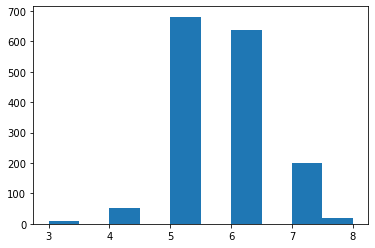

In [17]:
plt.hist(df["quality"])
print() 
#tiene pinta que muchas muestras el 70% de las muestras se les asigna una calidad de 5-6. 

In [18]:
#Para conocer el promedio de los diversos compuestos quimicos atraves de las diferentes calidades. 
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [19]:
#Para hacer que cada columna cuente por igual, vamos a normalizar, a tipificar el dataset. 
#normalizacion de los datos. 
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [20]:
#empezaremos con un clustering jerarquico con scikit - learn. 
from sklearn.cluster import AgglomerativeClustering

In [21]:
clus = AgglomerativeClustering(n_clusters = 6, #numeros de clusters, de divisiones
                               linkage = "ward").fit(df_norm) #metodo de enlace y con fit el data set normalizado. 

In [41]:
#ahora obtenemos las etiquetas. 
md_h = pd.Series(clus.labels_)
md #tenemos cada una de las muestras a que cluster pertenece. 

0       2
1       2
2       2
3       3
4       2
       ..
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

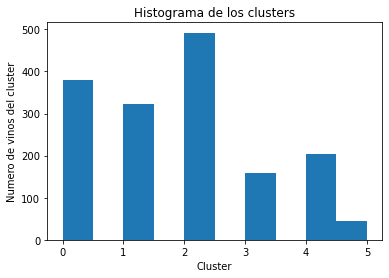

In [28]:
plt.hist(md)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Numero de vinos del cluster")
print()


In [ ]:
#hay 6 clusters, que masomenos se corresponden con las categorias que teniamos arriba. 
#hay muchos mas vinos males, que los que arriba han sido catalogados como malos. 


In [31]:
clus.children_ #Tenemos la estructura de cada uno de los hijos. 

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [33]:
#podemos usar 
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
#hacemos la representacion 
Z = linkage(df_norm, "ward")

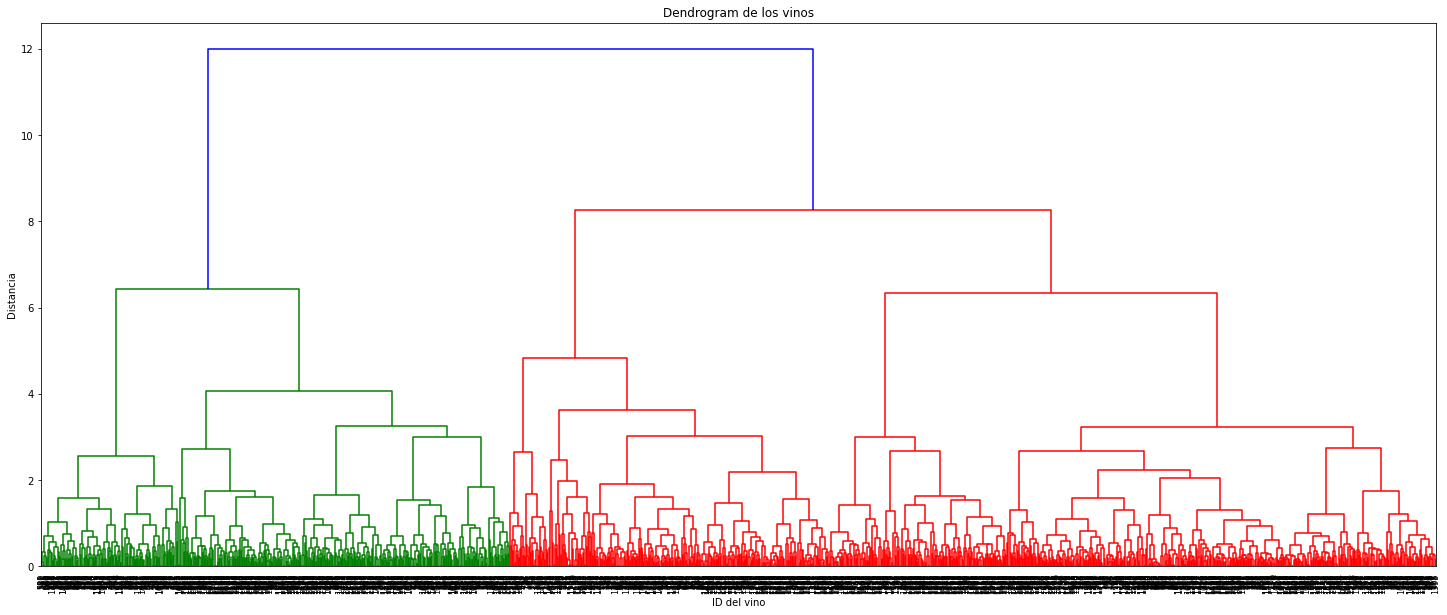

In [35]:
plt.figure(figsize = (25,10))
plt.title("Dendrogram de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation = 90., leaf_font_size = 8.)
plt.show()
#dendrograma con los 1600 vinos. 
#Las 6 categorias habria que cortar a una distancia entre el 4 y 6. 
#quedaria cortado perfectamente, como quisieramos. 

In [37]:
#clusteing con k means 
#elegimos 6 como el numero de clusters. 
from sklearn.cluster import KMeans
from sklearn import datasets

In [38]:
model = KMeans(n_clusters = 6)
model.fit(df_norm)
#Lo que hace esto es crear el modelo k means para el dataset de vinos normalizado. 

KMeans(n_clusters=6)

In [39]:
#veremos que observacion pertence a cada uno de los clusters. 
#nos muestra las etiquetas de a que categoria a que clase, pertence todos y cada uno de los vinos y para una mejor obervacion. 
model.labels_

array([0, 0, 0, ..., 4, 0, 1])

In [40]:
md_k = pd.Series(model.labels_)

In [43]:
#el modelo con k means  y con jerarquico los vamos a incorporar al dataset original y definir en el dataset normalizado una columna 
#que sea cliuster jerarquico 
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [44]:
df_norm.head()
#vemos que no tienen que coincidir el identificador del clustering tiende a ser distinto, lo que si sucede es que son iguales entre si 
#los primeros 3 pertenecen al  mismo cluster. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,0
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,0
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,2
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,0


(array([358.,   0., 236.,   0., 223.,   0., 251.,   0., 219., 312.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

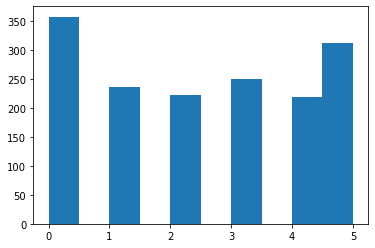

In [45]:
plt.hist(md_k)
#vemos que sigue existiendo un elemento dominante, uno que apenas tiene presencia. 
#el resto tiene aproximadamente las mismas alturas. 
#tambien el modelo es capaz de darnos los centroides. 

In [46]:
model.cluster_centers_
#tenemos las 12 variables del dataset y el centro de cada una de ellas. 
#las primeras 3 filas son el centro del primer cluster, sus caracterisisticas normalizadas. 

array([[0.23945716, 0.38616362, 0.06622905, 0.09324061, 0.12091848,
        0.16521756, 0.10468445, 0.48140674, 0.52177451, 0.15254407,
        0.23587595, 0.42625698],
       [0.37108145, 0.15522696, 0.43279661, 0.1063095 , 0.10532384,
        0.16579136, 0.08396718, 0.40615433, 0.41198452, 0.23992693,
        0.50202086, 0.71440678],
       [0.59149173, 0.20527981, 0.54600897, 0.13210271, 0.16981965,
        0.14551885, 0.09681662, 0.65673337, 0.31686734, 0.25184608,
        0.29683799, 0.55067265],
       [0.32718683, 0.28019429, 0.31167331, 0.17401626, 0.12961177,
        0.41204197, 0.31616291, 0.55067249, 0.42510274, 0.19109192,
        0.21726428, 0.45418327],
       [0.17545561, 0.31625696, 0.09762557, 0.09338838, 0.09525007,
        0.2516239 , 0.12665989, 0.32007724, 0.57584583, 0.1872693 ,
        0.49654607, 0.6173516 ],
       [0.32241321, 0.27692527, 0.27586538, 0.08789954, 0.13476521,
        0.14662333, 0.13676724, 0.51565618, 0.42168888, 0.18534086,
        0.2091716 ,

In [47]:
#el factor para ver la eficiencia del modelo 
model.inertia_ #es el valor de la suma de los cuadrados internos. 

188.5590145911025

 ## interpretacion final 
nuestro clustering ahora se puede usar para colocar un precio a cada una de las muestras del vino del mismo cluster, de modo que todos los que pertencen al mismo cluster deberian tener un precio similar y asi hacer una campaña de marketing para los clientes que prefieran un determinaod ingrediente en el vino o para diferenciar una marca de otra. Para ello calcularemos el precio de la composicion de cada cluster para cada componente. 

In [48]:
df_norm.groupby("clust_k").mean()
#este dataset esta formado por los cluster que se han creado. 
#ahora la calidad del vino y el sabor depende de las variables. 
#podemos dar una conclusion: 
#gente de las regiones frias, como del norte de europa suelen preferir el vino con mayor volatilidad de acido, por tanto tendriamos que 
#del catalogo de vinos disponibles los pertenecientes al cluster numero 3 y los del cluster numero 0, serian los adecuados. 
#cluster 0 y 3 se deberian marcar como preparados o especiales para regiones frias, o en la zona fria de los supermercados. 

#tambien a la gente que le gustan los vinos con mayor nivel de alcohol, tenemos 2 vinos especiales para esta gente. 
#tenemos los vinos del cluster 0 y 4. 

#de calidad los mas conocedores optarian por el 4 y el 0, que son los dos con nivel de calidad maximo. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.239457,0.386164,0.066229,0.093241,0.120918,0.165218,0.104684,0.481407,0.521775,0.152544,0.235876,0.426257,2.139665
1,0.371081,0.155227,0.432797,0.106309,0.105324,0.165791,0.083967,0.406154,0.411985,0.239927,0.502021,0.714407,0.080508
2,0.591492,0.205280,0.546009,0.132103,0.169820,0.145519,0.096817,0.656733,0.316867,0.251846,0.296838,0.550673,2.470852
3,0.327187,0.280194,0.311673,0.174016,0.129612,0.412042,0.316163,0.550672,0.425103,0.191092,0.217264,0.454183,1.031873
4,0.175456,0.316257,0.097626,0.093388,0.095250,0.251624,0.126660,0.320077,0.575846,0.187269,0.496546,0.617352,3.388128
5,0.322413,0.276925,0.275865,0.087900,0.134765,0.146623,0.136767,0.515656,0.421689,0.185341,0.209172,0.480128,1.535256


# 129. EL METODO DEL CODO

Decidir el valor optimo de k, es una de las partes mas dificiles a la hora de elaborar un clustering por k mean, existen varios metodos que se pueden usar: 
* metodo del codo : si representamos el numero de clusters, la funcion suele presentar un codo que marca el k optimo para el metodo de k-means
* metodo de la silueta 

Tenemos varias tecnicas para saber el numero optimo de k, el metodo del codo, de las siluetas y asumiendo un numero k arbitrario. 

# 130. IMPLEMENTANDO LA TECNICA DEL CODO Y EL COEFICIENTE DE LA SILUETA 

Decidir el numero optimo de clusters

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
#definimos nuestro dataset 
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2) #lo organiza en filas y columnas las filas son la longitud de x1 y tenemos dos columnas 


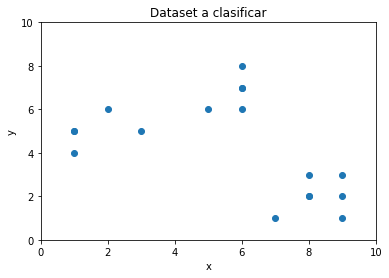

In [56]:
#haremos un plot de los datos originales. 
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()
#podemos decir que hay 3 conjuntos de puntos. 

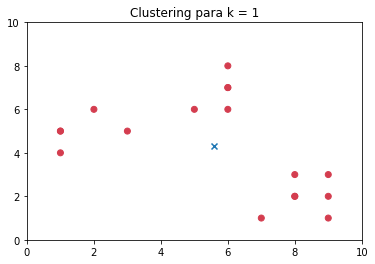

* Para k =  2  el promedio de la silueta es de : 0.6113424368705715
   - Para i =  1  la silueta del cluster vale :  0.7746251901389686
   - Para i =  2  la silueta del cluster vale :  0.49704450958269375


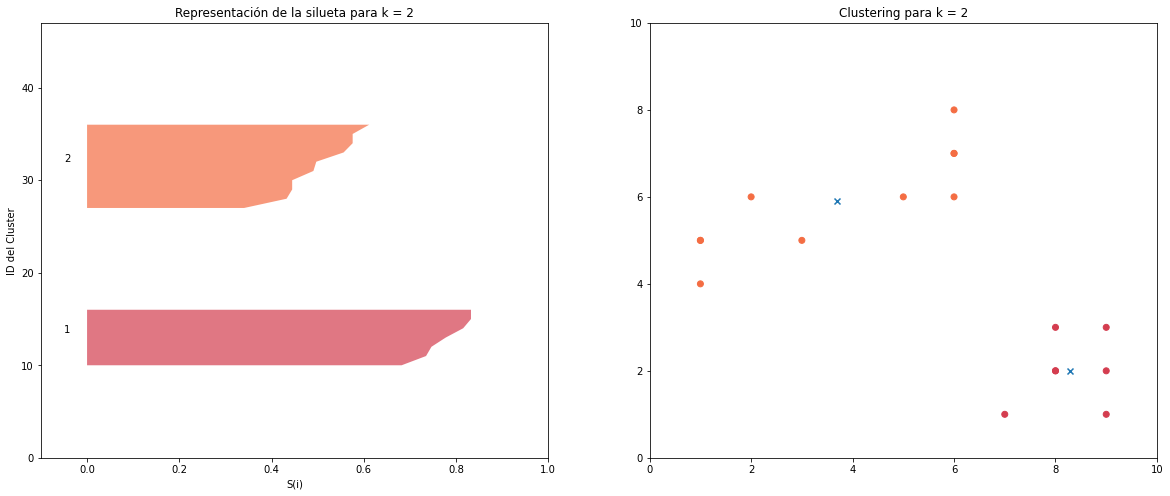

* Para k =  3  el promedio de la silueta es de : 0.7122079383287169
   - Para i =  1  la silueta del cluster vale :  0.7345257364682265
   - Para i =  2  la silueta del cluster vale :  0.6609508863896014
   - Para i =  3  la silueta del cluster vale :  0.7322200728725188


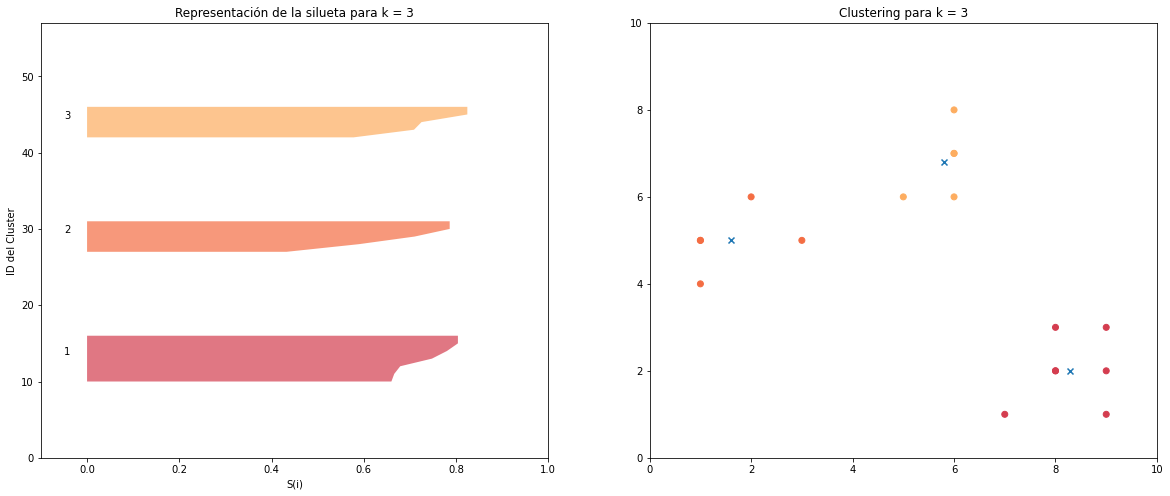

* Para k =  4  el promedio de la silueta es de : 0.6389948643127632
   - Para i =  1  la silueta del cluster vale :  0.655666655624379
   - Para i =  2  la silueta del cluster vale :  0.7345257364682265
   - Para i =  3  la silueta del cluster vale :  0.654458796162702
   - Para i =  4  la silueta del cluster vale :  0.24096929517637128


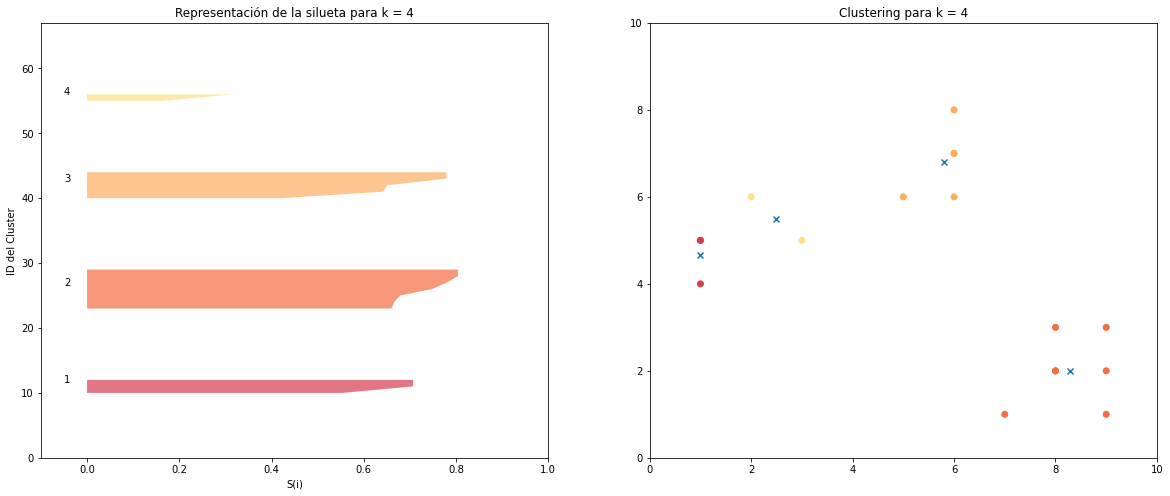

* Para k =  5  el promedio de la silueta es de : 0.46983374375750137
   - Para i =  1  la silueta del cluster vale :  0.37765685097302226
   - Para i =  2  la silueta del cluster vale :  0.24096929517637128
   - Para i =  3  la silueta del cluster vale :  0.655666655624379
   - Para i =  4  la silueta del cluster vale :  0.654458796162702
   - Para i =  5  la silueta del cluster vale :  0.0


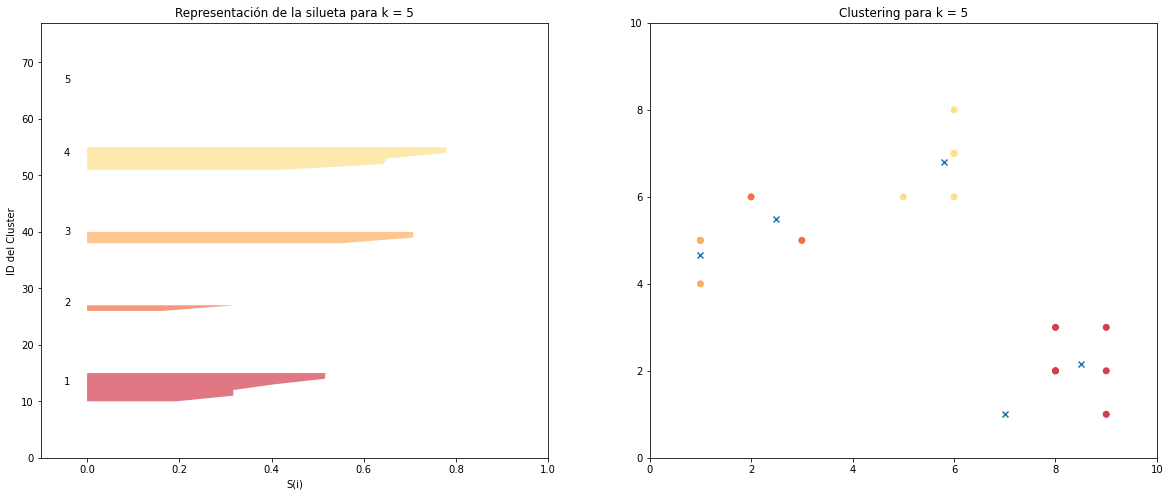

* Para k =  6  el promedio de la silueta es de : 0.38502282100382856
   - Para i =  1  la silueta del cluster vale :  0.19019110726892913
   - Para i =  2  la silueta del cluster vale :  0.32882042637679976
   - Para i =  3  la silueta del cluster vale :  0.24096929517637128
   - Para i =  4  la silueta del cluster vale :  0.5664789734180768
   - Para i =  5  la silueta del cluster vale :  0.655666655624379
   - Para i =  6  la silueta del cluster vale :  0.39420804524336517


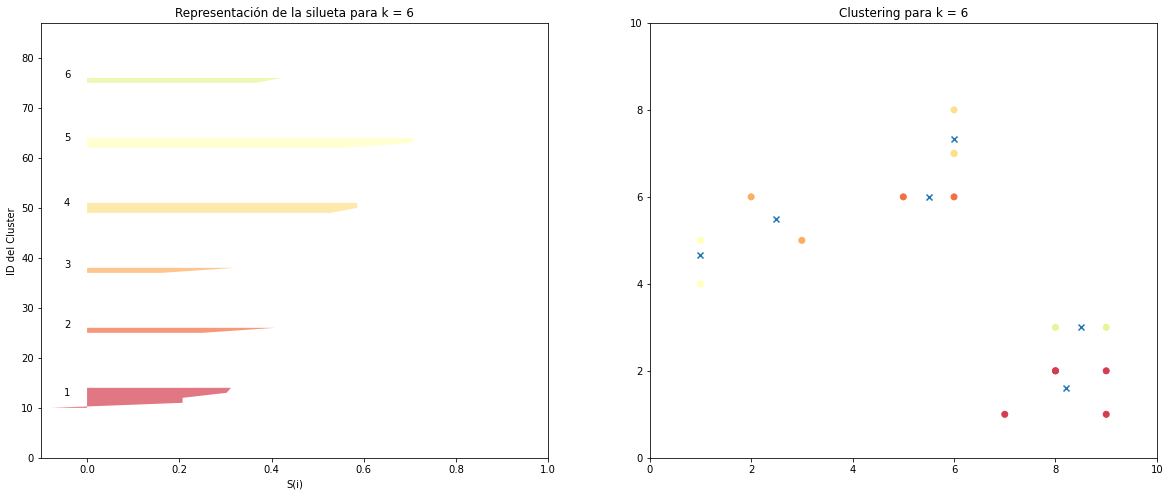

* Para k =  7  el promedio de la silueta es de : 0.42012495980374426
   - Para i =  1  la silueta del cluster vale :  0.655666655624379
   - Para i =  2  la silueta del cluster vale :  0.31256470041698214
   - Para i =  3  la silueta del cluster vale :  0.32882042637679976
   - Para i =  4  la silueta del cluster vale :  0.2751262658470836
   - Para i =  5  la silueta del cluster vale :  0.24096929517637128
   - Para i =  6  la silueta del cluster vale :  0.5664789734180768
   - Para i =  7  la silueta del cluster vale :  0.3869086846339371


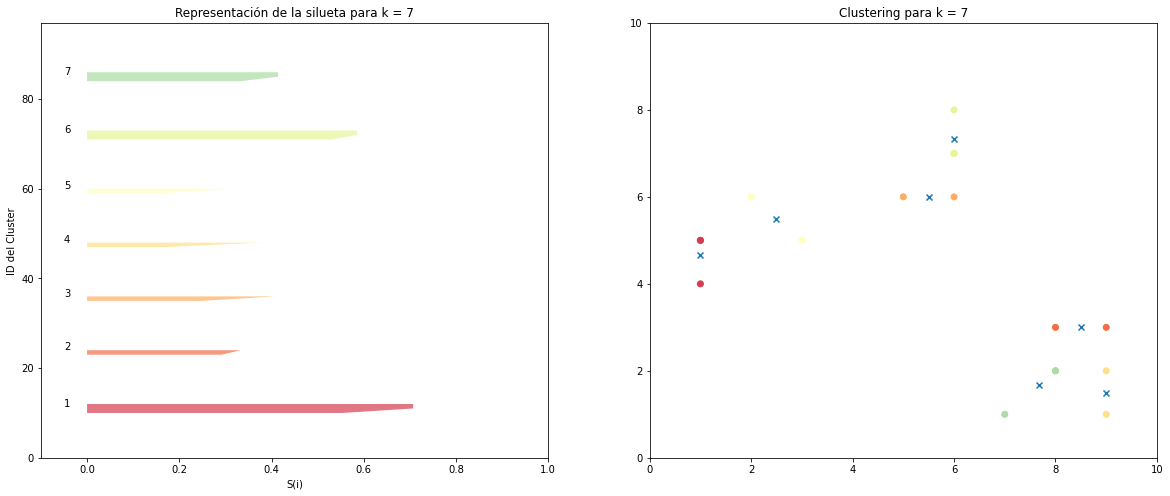

* Para k =  8  el promedio de la silueta es de : 0.4348119275212126
   - Para i =  1  la silueta del cluster vale :  0.24096929517637128
   - Para i =  2  la silueta del cluster vale :  0.14644660940672627
   - Para i =  3  la silueta del cluster vale :  0.5664789734180768
   - Para i =  4  la silueta del cluster vale :  0.655666655624379
   - Para i =  5  la silueta del cluster vale :  0.14644660940672627
   - Para i =  6  la silueta del cluster vale :  0.0
   - Para i =  7  la silueta del cluster vale :  0.32882042637679976
   - Para i =  8  la silueta del cluster vale :  1.0


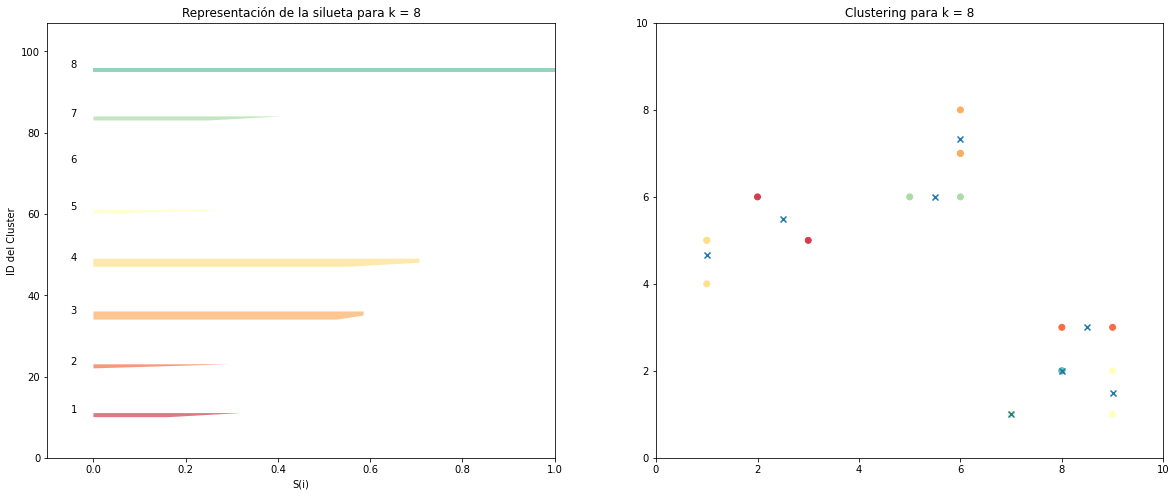

* Para k =  9  el promedio de la silueta es de : 0.39932610787930767
   - Para i =  1  la silueta del cluster vale :  0.14644660940672627
   - Para i =  2  la silueta del cluster vale :  0.0
   - Para i =  3  la silueta del cluster vale :  0.32882042637679976
   - Para i =  4  la silueta del cluster vale :  0.6152265411044983
   - Para i =  5  la silueta del cluster vale :  0.5664789734180768
   - Para i =  6  la silueta del cluster vale :  1.0
   - Para i =  7  la silueta del cluster vale :  0.0
   - Para i =  8  la silueta del cluster vale :  0.0
   - Para i =  9  la silueta del cluster vale :  0.14644660940672627


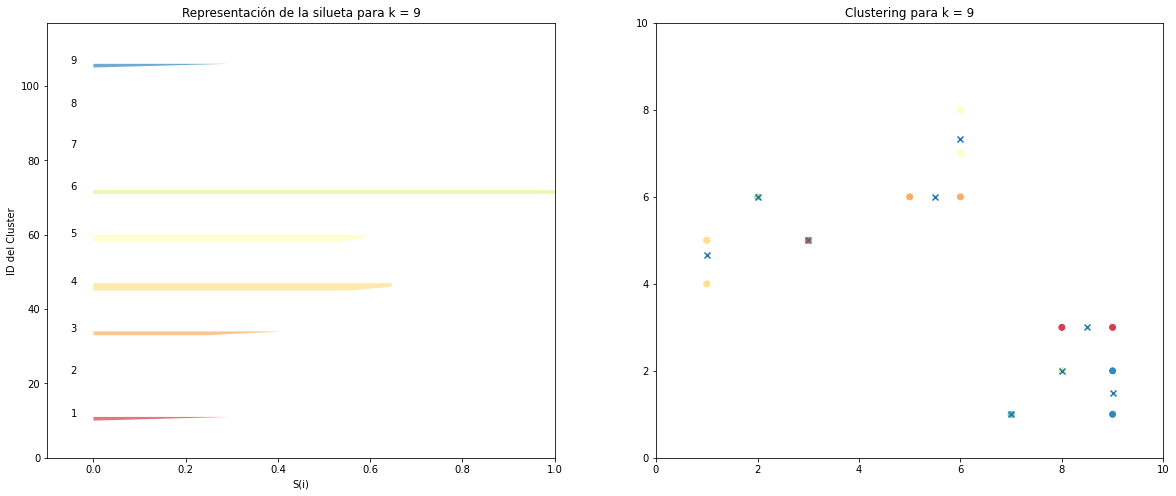

In [69]:
max_k = 10## maximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = []
cmap = plt.get_cmap("Spectral")
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))


for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    ##Fabricaremos una silueta para cada cluster
    # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
    if 1<k<len(X):
       ##Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
    
        #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1, 1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
        #entre siluetas individuales de cada cluster para separarlas.
        axis1.set_ylim([0, len(X)+ (k+1)*10])
    
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
        
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Pintamos la silueta del cluster i-ésimo
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1], marker = "x")
    plt.show()

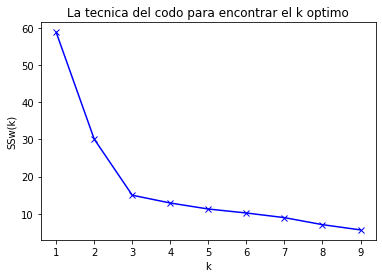

In [74]:
#Representacion del codo 
plt.plot(K, ssw, "bx-") #x es para el dibujo, la linea que une los puntos "-"
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La tecnica del codo para encontrar el k optimo")
plt.show()
#ambas tecnicas coinciden. 

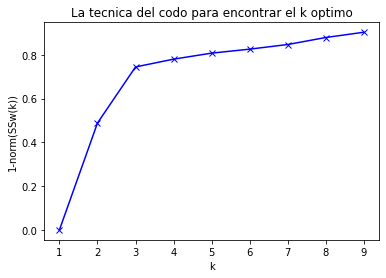

In [75]:
#representacion del codo normalizado 
#Representacion del codo 
plt.plot(K, 1- ssw / sst, "bx-") #x es para el dibujo, la linea que une los puntos "-"
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k))")
plt.title("La tecnica del codo para encontrar el k optimo")
plt.show()
#ambas tecnicas coinciden. 

# 132. PROPAGACION DE LA AFINIDAD

Una de las debilidades que tiene el algoritmo de k means es que necesitamos definir el numero de cluster que esperamos encontrar en los datos, si no estamos seguros del valor a encontrar, podemos usar alguna de las tecnicas como opciones para encontrar un valor razonable, por contra en 2007 empezo a surgir un nuevo algoritmo, llamado la propagacion de la afinidad, que se basaba en crear clusterings con una tecnica llamada "de transferencia de mensajes" entre los datos del dataset. esta tecnica intenta encontrar de forma automatica el numero de  cluster apartir de los puntos del dataset. 

# 133. IMPLEMENTANDO LA PROPAGACION DE LA AFINIDAD 

Generaremos unos datos aleatorios

In [76]:
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics 
from sklearn.datasets.samples_generator import make_blobs 

C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [78]:
centers = [[1,1], [-1,-1], [1,-1]] #centros de los cuales generaremos los clusters. 
X, labels = make_blobs(n_samples = 300, centers = centers, cluster_std = 0.5, random_state = 0)

In [80]:
import matplotlib.pyplot as plt
from itertools import cycle

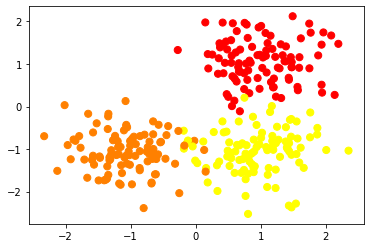

In [81]:
plt.scatter(X[:,0], X[:,1], c = labels, cmap = "autumn", s = 50)
#tenemos las 3 distribuciones, se aprecia que existen 3. 
#dependiento de la tecnique, porque nosotros ya sabemos que son 3 clusters, por el metodo del codo que hicimos antes. 

In [82]:
#calcular el metodo de la afinidad. 
af = AffinityPropagation(preference = -50).fit(X)

C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


In [87]:
cluster_center_ids = af.cluster_centers_indices_
#Nos devuelva los indices, los numeros del dataset que hemos generados, sera el punto en la posicion 160, 
#el punto en la posi 250 y en la 272, esos van a ser los clusters_id, los identificadores que diran donde estan los centros.

In [85]:
#al modelo tambien le podemos pedir las etiquetas para cada uno de ellos. 
af.labels_ #a que cluster pertenece cada uno de los puntos. 

array([0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1], d

In [89]:
#tambien podemos ver cuantos cluster ha generado 
n_clust = len(cluster_center_ids)
n_clust #ha generado 3 centros. 

3

In [95]:
#ahora podemos hacer un pequeño deporte de que es lo que ha devuelto este algoritmo. 
#una funcion que imprima tooda esta informacion 
def report_affinity_propagation(X): 
    af = AffinityPropagation(preference = -50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mútua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members, 1], col +'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1], x[1]], col)
            
    plt.title("Número estimado de clusters %d"%n_clust)
    plt.show()

C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Número estimado de clusters: 3
Homogeneidad: 0.872
Completitud: 0.872
V-measure: 0.872
R2 ajustado: 0.912
Información mútua ajustada: 0.871
Coeficiente de la silueta: 0.735


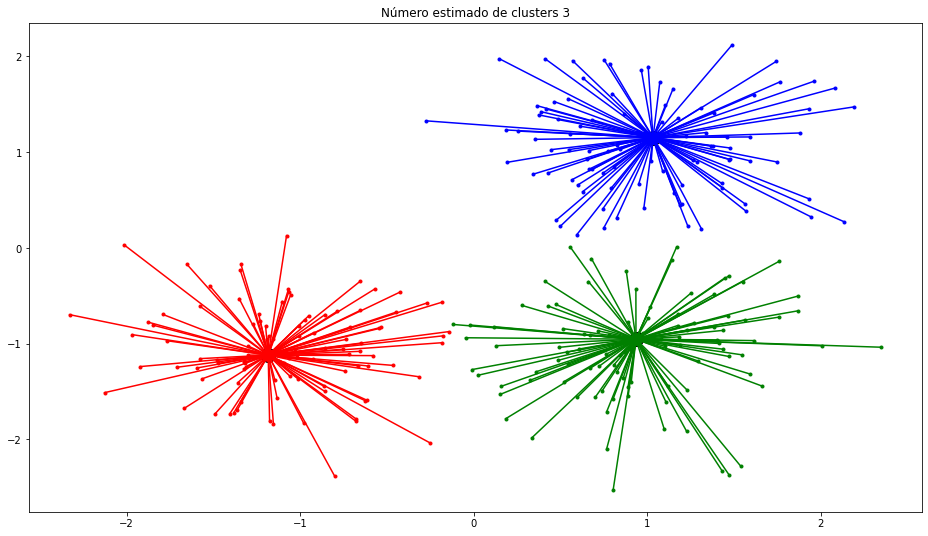

In [96]:
report_affinity_propagation(X)

# 134. GENERANDO DISTRIBUCIONES EN FORMA DE ANILLO 

Distribucion que puede ser muy dificil de clasificar correctamente a traves de una tecnica como k - means, kmeans tienen a clsificar clusters circulares y tiende a aglutinar en su interior tantas muestras como sea posible. sin embargo utilizar esta tecnica no es la mejor del mundo. Generaremos una distribucion aleatoria interesante. 

In [4]:
#Distribuciones en forma de anillo
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd 
import numpy as np
import matplotlib.pyplot as plt
#con esas librerias generaremos una funcion que generara un anillo de puntos 

In [10]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0,2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

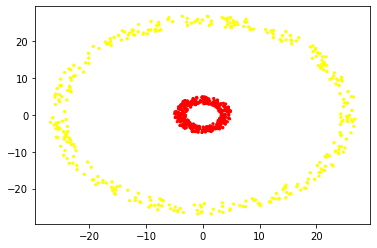

In [14]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")
#distribucion de anillos, la idea es ver si es posible aplicar el algoritmo de k means para generar una claisificacion.

In [15]:
## ALGORITMO CON K MEANS 
from sklearn.cluster import KMeans 

In [16]:
km = KMeans(2).fit(data)

In [17]:
clust = km.predict(data)

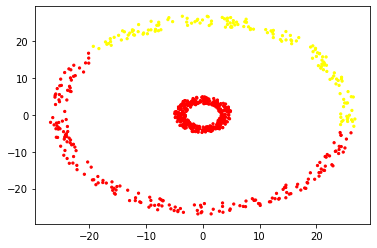

In [18]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "autumn")
#veamos como ha dividido el cluster los datos, 
#el problema esta en que el algoritmo es incapaz de satisfacer dos cluster naturales de datos, basados en anillos concentricos. 
#el centro del anillo, tiene tantos puntos ne su interior como lo spodrian haber en su exterior. 
#la estrategia de los kmeans es imposible que funcione en este caso. 
#en este caso habra que usar otra clasificacion distinta. 

In [ ]:
#tiene un probla es que se basa en usar distancias, metricas. 
#que producen objetos que en general son convexos. 
#habra casos en lo que debamos  de encontrar otro tipo de distancias, como podrian ser las correlaciones y justo aqui es donde entra 
#el juego la tecnica de las K medoides, tecnica que consiste en seleccionar k puntos iniciales dentro del conjunto incial de cluster
#para cada uno de los puntos del dataset calcualaremos el centro del cluster mas cercano con cualquier tipo de metrica, 
#y la diferencia esta en que el centro del cluster no quedara asignado al varincentro de esos puntos, sino que quedara asignado 
#a dicho punto en cuestion. para cada punto del cluster lo que hara sera intercambiar el centro del cluster con el punto 
#y calcular la reduccion en las distancias totales con respecto al centro del cluster. 


## ALGORITMO DE LOS K MEDOIDES 


In [21]:
from pyclust import KMedoids #libreria que ya no vienen en el nucleo de python y las debemos de implantar

In [23]:
kmed = KMedoids(2).fit_predict(data) #hace el modelo y la prediccion en la misma sentencia. 

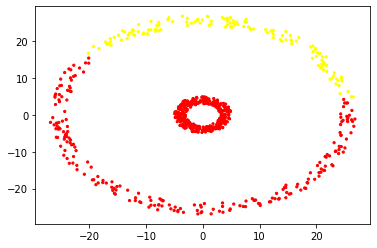

In [24]:
plt.scatter(data[:,0], data[:,1], c = kmed , s = 5, cmap = "autumn")
#no hay mucha mejora respecto al clustering de k means. 

In [ ]:
#habra que cambiar el algoritmo de clustering. 
#habria que optar generar un clustering a quien no le importe demasiado que esten distribuidos de forma cicular donde la 
#distancia no tenga tanta importancia. 
#conocemos un tipo de clustering, el jerarquico aglomerativo y lo podriamos probar. 
#¿Que podemos hacer? suele usarse las transformacion lineales, buscando los valores y vectores propios del dataset. 
#tecnica muy ultizada cuando se trabaja con datos no estrucutrados. 

In [25]:
#ALGORITMO DEL CLUSTERING ESPECTRAL 
from sklearn.cluster import SpectralClustering

In [26]:
clust = SpectralClustering(2).fit_predict(data)
#genera la matriz global de valores y vectores propios apartir de haber llevado acabo una transformacion de los datos originales 
#el clustering usa una transformacion que ira aparececiendo sucesivamente. 
#que es el kernel gaussiano. 

# 141. ALGORITMOS PARA LA GENERACION DE ARBOLES DE CLASIFICACION

Usaremos el dataset de Iris, trae informacion sobre la anchura de los sepalos y petalos. 

#### ARBOL DE DESICION PARA ESPECIES DE FLORES 

In [1]:
import pandas as pd

In [119]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [120]:
import matplotlib.pyplot as plt

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

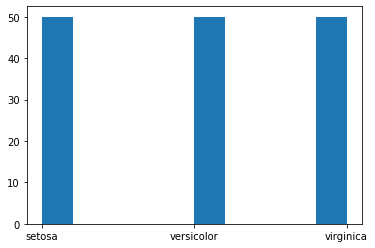

In [121]:
plt.hist(data.Species)
#Tenemos el dataset mas homogeneo, 50 setosas, 50 versilocores y 50 virginicas

In [122]:
data.Species.unique()
#El proposito es intentar clasificar a las flores pertencecientes a una de esas 3 especies, basandonos en las dimensiones. 
#podriamos obtener la variable objetivo y predictora por lados distintos, 

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [123]:
colnames = data.columns.values.tolist()
colnames

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [124]:
predictors = colnames[:4]
target = colnames[4]

In [125]:
#dividiremos el dataset en fase de entrenamiento y de testing 
import numpy as np 

In [126]:
data["is_train"] = np.random.uniform(0,1, len(data))<= 0.75 #datos entre 0 y 1 de la longitud de data, marcando true lo que estan por debajo de 0.75

In [127]:
#Definimos 
train, test = data[data["is_train"] == True], data[data["is_train"] ==False] #definiendo dos variables de golpe. 

In [128]:
len(train), len(test)

(115, 35)

In [129]:
#creamos el arbol de desicion 
from sklearn.tree import DecisionTreeClassifier

In [130]:
#creamos el arbol 
tree = DecisionTreeClassifier(criterion = "entropy", #El criterio, clasificaremos por entropia
                              min_samples_split = 20, #numero minimo de elementos para llevar acabo una division 
                              random_state = 99) #estado aleatorio. #Todo esto nos crea el arbol y con este mismo 
#con el fit le decimos que nos modele los datos del conjunto de entrenamiento 
tree.fit(train[predictors], #train utilizando solamente las variables predictors 
         train[target]) #y el objetivo la variable target del conjunto train.

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [131]:
#el arbol esta listo, lo usaremos para predecir el otro 25% que no hemos usado. 
preds = tree.predict(test[predictors])

In [132]:
#para ver si el resultado de la prediccion usado por el arbol concuerda o no, en base a lo que habiamos dicho. 
#hacemos una tabla de doble entrada. 
pd.crosstab(test[target], preds, rownames = ["Actual"], colnames = ["Predictions"])
#La primera linea del trozo es utilizar el arbol de dicision para predecir la clase de flor para las flores del conjunto de testing
#usando solo las dimensiones. 
#se intepreta : 
#todas las setosas han sido clasificadas como setosas por el arbol 
#habian 13 setosas, de las cuales 12 han sido clasificadas como versicolor pero uno ha sido catalogada erroneamente. 

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,9,0,0
versicolor,0,12,2
virginica,0,0,12


In [ ]:
#representacion visual del arbol y ver que tiene ese objeto, ver como queda la clasificacion. 


# 145. EL TRATAMIENTO DE FICHEROS DOT 

4 PASOS PARA VER EL ARBOL DE MANERA VISUAL CON LA LIBRERIA

In [16]:
#Vamos a tener que crear un archivo .dot desde el modelo que ha creado el arbol de clasificacion, para ello en python 
#habra que usar el modulo grabi, subpaquete de sklearn. 
#Este archivo .dot tiene toda la info necesaria para llegar a hacer la representacion grafico del arbol. 
from sklearn.tree import export_graphviz

In [34]:
with open("C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file = dotfile, feature_names = predictors)
    dotfile.close()

In [35]:
import os 
from graphviz import Source 

In [36]:
file = open("C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/iris_dtree.dot", "r")
text = file.read()
text #Es el texto que hemos visto en word, sobre el arbol de desicion. 

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.584\\nsamples = 114\\nvalue = [37, 40, 37]"] ;\n1 [label="entropy = 0.0\\nsamples = 37\\nvalue = [37, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 4.75\\nentropy = 0.999\\nsamples = 77\\nvalue = [0, 40, 37]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Width <= 1.65\\nentropy = 0.176\\nsamples = 38\\nvalue = [0, 37, 1]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 37\\nvalue = [0, 37, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n3 -> 5 ;\n6 [label="Petal.Length <= 4.95\\nentropy = 0.391\\nsamples = 39\\nvalue = [0, 3, 36]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.954\\nsamples = 8\\nvalue = [0, 3, 5]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 31\\nvalue = [0, 0, 31]"] ;\n6 -> 8 ;\n}'

In [37]:
Source(text)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

### PENDIENTE 

# 146. LA VALIDACION CRUZADA EN UN ARBOL DE  CLASIFICACION

Es hora de validar y podar el arbol de desicion. 
* Tecnica de validacion cruzada para la poda. 

El arbol pudo haber crecido mucho y haberse vuelto mas complejo, crear un arbol optimo en profundidad. 
* Iremos podando el arbol para ir obteniendo una profundidad optima para que no sufra problemas de overfitting ni averfittig. 
* La forma que hay de que el arbol no se acomode al dataset y sea capaz de hacer una prediccion total es la validacion cruzada atraves de todo el dataset. 

In [133]:
X = data[predictors]
Y = data[target]

In [41]:
#crearemos un nuevo arbol 
tree = DecisionTreeClassifier(criterion = "entropy", 
                              max_depth = 5, #hemos añadido una profundidad maxima de 5, para generar el arbol. 
                              min_samples_split = 20, 
                              random_state = 99 )
tree.fit(X,Y) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [44]:
#para implementar la validacion cruzada. 
from sklearn.model_selection import KFold

In [49]:
#haremos la validacion cruzada para implementar en un arbol de desicion. 
#n el numero de elementos a ser clasificados, 
cv = KFold(n_splits = 10, #se hacen 10 grupos, a cada grupo le tocan 15 flores
           shuffle = True, #Para que haga un muestreo aleatorio
           random_state = 1 ) #por si luego lo queremos repetir. 
#esto para la validacion cruzada

In [52]:
from sklearn.model_selection import cross_val_score
#la puntuacion o el indice de validacion cruzada 

In [58]:
scores = cross_val_score(tree,X, Y, scoring = "accuracy", cv = cv, n_jobs = 1)
scores
#los scores de la validacion cruzada, algunos son muy eficaces, 

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [54]:
score = np.mean(cross_val_score(tree, #qplicado al arbol de desicion 
                                X, Y, #sobre el conjunto de datos X y Y
                                scoring = "accuracy", #utilizando el scoring de precision, cuantos quedan mal clasificados
                                cv = cv, #la tecnica de validacion cruzada, que es la que hemos creado con n divisiones
                                n_jobs = 1))

In [55]:
score #hemos decidido hacer una validacion cruzada de 10 elementos, 10 grupos y el score es el promedio de las eficacias obtenidos
#de cada uno de los full, de cada una de las divisiones 
#hemos hecho el promedio 
#significa que es una eficacia muy alta. 
#si variamos la profundidad del arbol de clasificacion y la hacemos variar a un maximo de 10, podemo sobtener distintos valores 
#de la eficacia. 

0.9333333333333333

In [62]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion = "entropy",max_depth = i, min_samples_split = 20, random_state = 99 )
    tree.fit(X,Y)
    cv = KFold(n_splits = 10, shuffle = True, random_state = 1 )
    scores = cross_val_score(tree,X, Y, scoring = "accuracy", cv = cv, n_jobs = 1)
    score = np.mean(scores)
    print("Score para i = ", i, "es de ", score)
    print("    ", tree.feature_importances_)
    #para profundida superior a 4, la puntuacion permanece casi constante. 
    #para i = 3, profundidad 3, significa que si elegimos nuestro arbol solo crezca tres niveles desde el nodo raiz. 
    #nos dara la clasificacion mas optima prosible. 
    #tambien podemos imprimir en cada caso para el arbol de desicion los rasgos importantes para determinar cual de las 4 variables
    #que hay en el dataset es realmente la que mas cuenta o la mas importante para el modelo. 
    
    #cada uno de esos rectangulos va de la mano con las 4 variables que tenemos como predictoras. 
    #en el caso del primero el 1 hace referencia a Petal.Length, la variable que mas aporta
    #al sistema o que mas reduce la entropia. asi con todos los demas. 

Score para i =  1 es de  0.5666666666666667
     [0. 0. 1. 0.]
Score para i =  2 es de  0.9200000000000002
     [0.         0.         0.66620285 0.33379715]
Score para i =  3 es de  0.9400000000000001
     [0.         0.         0.68976981 0.31023019]
Score para i =  4 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  5 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  6 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  7 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  8 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  9 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  10 es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]


# ARBOLES DE REGRESION 

# 148. EL DATASET DE LAS CASAS DE BOSTON 

Dataset de los casas de Boston, informacion acerca de las casas, precio medio en distintas zonas de boston, la mayoria de variables predictoras son continuas, mientras que la variable objetivo el precio medio de la casa es una variable en el que el precio es continuo. el proposito de usar un arbol de regresion es para precisamente  saber cuanto me va a costar una casa (predecir).  

In [63]:
import pandas as pd 

In [64]:
data  = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/boston/Boston.csv")

In [65]:
data.head() #datos de 1978.
#crim  = por persona cuantos crimenes sucedes, multiplicado por 100.
#zn = proporcion de residentes por cada unidad de medida
#indus = proporcion de accesos empresariales, zonas de industria por la zona. 
#chas = variable dummy del rio cha, es 0 si la casa no esta cerca al rio. 
#nox = concentracio de oxido nitrico
#rm = promedio de habitaciones por casa 
#age = proporicion de unidades ocupadas antes de 1940. 
# dis = promedio de la distancia a 5 centros de empleo de boston 
#rad = indice de accesiblidad a las autopistas. 
#medv = precio medio de la vivienda en miles de dolares. 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [66]:
data.shape

(506, 14)

In [69]:
#asignamos las variables predictoras. 
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]
#ahora creamos nuestro arbol de regresion con scikit learn. 

# 149. ARBOLES DE REGRESION CON PYTHON 

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
regtree = DecisionTreeRegressor(min_samples_split = 30, #Minimo numero de observaciones necesarias para que un nodo sea considerado como ta, para ser dividido 
                                min_samples_leaf = 10, #Minimo numero de obervaciones necesarias para clasificar un nodo como nodo hoja 
                                random_state = 0)

In [73]:
regtree.fit(X,Y)

DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=30, random_state=0)

In [76]:
#haremos algunas predicciones del mismo dataset y ver como de precisas han sido para lo que es la variable objetivo. 
preds = regtree.predict(data[predictors])

In [77]:
data["preds"] = preds

In [79]:
data[["preds", "medv"]]
#El punto es observar si hay muchas observaciones que tienen el valor igual o similar a la prediccion. 
#se supone que el modelo se ha creado en base a un arbol y la variable a predecir en un modelo de regresion no es mas que el promedio. 
#de las variables de salida de las observaciones que caen dentro de un nodo particular, todas las observaciones que caen dentro del mismo nodo 
#tendran la misma prediccion como valor de salida. 


,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


In [80]:
from sklearn.tree import export_graphviz
with open("C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/Boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file = dotfile, feature_names = predictors)
    dotfile.close()
import os 
from graphviz import Source 
file = open("C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/iris_dtree.dot", "r")
text = file.read()
Source(text)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [84]:
#para comprobar la eficacia del modelo, 
#hacemos una validacion cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np 

In [94]:
#Definimos la validacion cruzada con el metodo KFold 
cv = KFold(n_splits = 10, shuffle = True, random_state = 1)
scores = cross_val_score(regtree, X, Y, 
                         scoring = "neg_mean_squared_error", #error cuadratico promedio para hacer la clasificacion 
                         cv = cv,
                         n_jobs = 1) #la validacion cruzada es la que hemos creado.
print(scores)
score = np.mean(scores)
print(score)
#tenemos todas las scores llevadas acabo por la validacion del error cuadrado promedio
#tambien tenemos el promedio global. 

#un promedio que nos de por ejemplo 20 ptos seria el error promedio, 20 puntos arriba, 20 puntos abajo en la prediccion. 
#tenemos le resultado, tambien podemos observar otras variables importantes,en el arbol de regresion, al igual
# que en el de clasificacion, una en particular era la importancia que aportaba cada atributo 
#en la seleccion de rasgos notorios en las variables.

[-13.64925886 -17.28987161 -16.98569707 -47.56954086  -9.26202865
 -17.23057023 -15.41541493 -31.33011027 -22.79877067  -9.54180723]
-20.107307036443846


In [98]:
#las variables mas importantes, las podemos mostrar apartir del arbol 
list(zip(predictors, regtree.feature_importances_))
#la variable mas importante es rm, luego esta lstat, 28% de la informacion.
#cuanto mas alto sea el valor del rasgo de importancia, mas importante es para la regresion, para calcular el valor final 
#de la casa. 


[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

# 150. RANDOM FORESTS

# 151. RANDOM FOREST PARA REGRESION 

Vamos a implementar un bosque aleatorio para el mismo dataset que hemos usado. Comprobaremos si hay una mejor en la tasa del error. 

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
#creamos le bosque 
forest = RandomForestRegressor(n_jobs = 2, #numero de trabajos simultaneos, especifica una paralelizacion en la computacion, tareas en paralelo que se van a ejecutar por el ordenador, tanto para clasificar como para predecir.  
                               oob_score = True, #variable binaria, con True el modelo hara un muestreo consigo mismo. 
                              n_estimators = 10) #especifica el numero de arboles, que el randomforest tendra. 
forest.fit(X,Y)#le pasamos todo el dataset, sin hacer validacion cruzada

C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=10, n_jobs=2, oob_score=True)

In [103]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred", "medv"]]
#las predicciones que ha llevado acabo el bosque aleatorio. 
#tenemos le valor que ha predicho el forest con 10 arboles y el valor original. 
#al haber creado el bosque ya es muy dificil que todos tengan el mismo valor. 
#calcularemos el error cuadratico medio para la prediccion. 

,rforest_pred,medv
0,30.066667,24.0
1,21.900000,21.6
2,34.640000,34.7
3,32.050000,33.4
4,33.266667,36.2
...,...,...
501,23.150000,22.4
502,20.683333,20.6
503,27.040000,23.9
504,26.500000,22.0


In [104]:
#para calcular el error cuadratico medio, podemos utilizar los valores de la variable que hemos predicho y compararlos con 
#los orginales. 
data["rforest_error2"] = (data["rforest_pred"] - data["medv"]) **2 
sum(data["rforest_error2"]) / len(data) #obtenemos le indice de error. 
#antes habiamos obtenido el -20.5, y lo hemos bajado a 16. 


16.69138658946945

In [108]:
#el objeto obb_score
forest.oob_score_ #similar al coeficiente R2 de la regresion, se obtiene, 0.8 es alto, 
#pero si queremos ver si el bosque aleatorio mejora el resultado. 

0.8022805692250681

In [109]:
#generamos mas arboles, 500
forest = RandomForestRegressor(n_jobs = 2, #numero de trabajos simultaneos, especifica una paralelizacion en la computacion, tareas en paralelo que se van a ejecutar por el ordenador, tanto para clasificar como para predecir.  
                               oob_score = True, #variable binaria, con True el modelo hara un muestreo consigo mismo. 
                              n_estimators = 500)
forest.fit(X,Y)

RandomForestRegressor(n_estimators=500, n_jobs=2, oob_score=True)

In [ ]:
#recreamos las columnas. 


In [110]:
data["rforest_pred"] = forest.oob_prediction_
data[["rforest_pred", "medv"]]
#se aproxima mejor con 500 arboles. 


,rforest_pred,medv
0,28.088830,24.0
1,22.379803,21.6
2,34.443094,34.7
3,34.905820,33.4
4,34.450292,36.2
...,...,...
501,24.040426,22.4
502,19.032184,20.6
503,28.263934,23.9
504,25.759412,22.0


In [112]:
#recalculamos el error 
data["rforest_error2"] = (data["rforest_pred"] - data["medv"]) **2 
sum(data["rforest_error2"]) / len(data)
#lo hemos bajado bastante, con respecto a tener solo 10 arboles. 

10.313355850788735

In [114]:
forest.oob_score_

0.8778321479005372

# 152. RANDOM FOREST PARA CLASIFICACION 

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
forest = RandomForestClassifier(n_jobs = 2, oob_score = True, n_estimators = 10)
forest.fit(X,Y)

C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\URIEL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=10, n_jobs=2, oob_score=True)

In [136]:
#para observar los resultados 
forest.oob_decision_function_
#es un array que nos dice, para cada uno de los elementos, cada uno de ellos ha decidido con que probabilidad cae
#dentro de cada clase. 
#por ejemplo la numero 1. es una setosa, porque predomina el 1 de los 3 numeros que hay por fila. 
#si el 1 esta enmedio es porque entonces es una versicolor, es mas probable que sea versicolor. 
#lo peor es que se quede en 0.5, 0.5. 


array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.